In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

-cv2: Library OpenCV digunakan untuk operasi pada gambar seperti membaca gambar, konversi ke grayscale, dan filtering

-numpy: Library untuk operasi numerik pada array, digunakan di sini untuk padding gambar dan perhitungan mean filtering

-matplotlib.pyplot: Library untuk visualisasi data, digunakan untuk menampilkan gambar

In [2]:
# Fungsi untuk mean filtering manual
def manual_mean_filtering(image, kernel_size):
    height, width = image.shape
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    
    output_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            local_sum = 0
            for m in range(kernel_size):
                for n in range(kernel_size):
                    local_sum += padded_image[i + m, j + n]
            output_image[i, j] = local_sum // (kernel_size * kernel_size)
    
    return output_image

-Padding: Padding diperlukan agar filter dapat diterapkan ke tepi gambar tanpa kehilangan data. Padding dilakukan dengan nilai nol

-Looping: Dua loop for digunakan untuk iterasi melalui setiap piksel gambar. Dua loop tambahan digunakan untuk iterasi melalui 
elemen kernel (5x5 dalam hal ini)

-Mean Calculation: Jumlah nilai piksel dalam jendela kernel dihitung dan dibagi dengan jumlah elemen dalam kernel untuk mendapatkan nilai rata-rata

In [3]:
# Fungsi untuk median filtering
def median_filtering(image):
    return cv2.medianBlur(image, 5)

Median Filtering: Fungsi OpenCV cv2.medianBlur digunakan untuk menerapkan filter median pada gambar dengan kernel 5x5. Filter median efektif untuk menghilangkan noise impuls

In [6]:
# Mengunggah gambar
image_path = 'foto.jpg'  
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

Baca Gambar: Gambar dibaca dari direktori lokal menggunakan cv2.imread. Parameter cv2.IMREAD_COLOR digunakan untuk membaca gambar berwarna

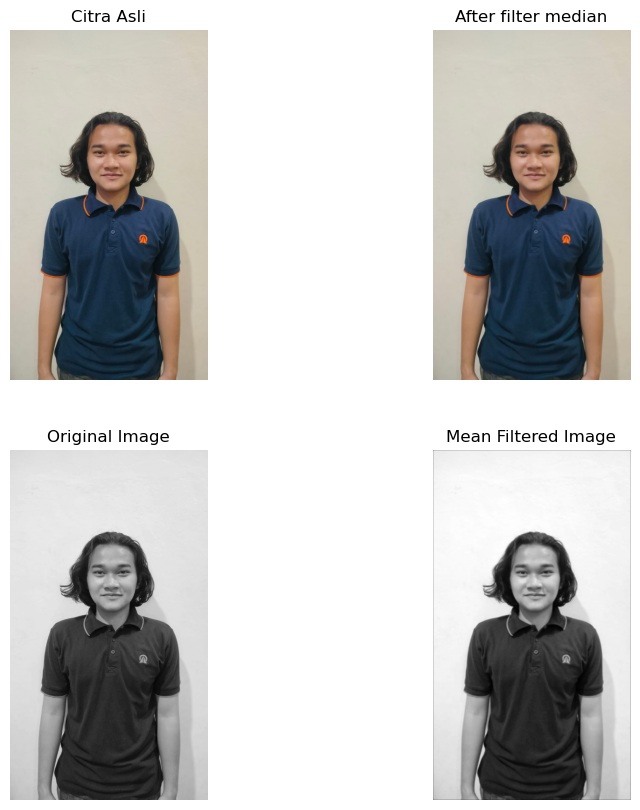

In [5]:
if image is None:
    print(f"Error: Gambar tidak ditemukan atau tidak dapat dibaca. Pastikan path '{image_path}' benar.")
else:
    # Konversi gambar ke grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Median filtering menggunakan OpenCV
    median_filtered_image = median_filtering(image)

    # Mean filtering secara manual
    mean_filtered_image = manual_mean_filtering(gray_image, 5)

    # Menampilkan hasil menggunakan matplotlib
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title('Citra Asli')
    axs[0, 0].axis('off')

    axs[0, 1].imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
    axs[0, 1].set_title('After filter median')
    axs[0, 1].axis('off')

    axs[1, 0].imshow(gray_image, cmap='gray')
    axs[1, 0].set_title('Original Image')
    axs[1, 0].axis('off')

    axs[1, 1].imshow(mean_filtered_image, cmap='gray')
    axs[1, 1].set_title('Mean Filtered Image')
    axs[1, 1].axis('off')

    plt.show()


-Pengecekan: Mengecek apakah gambar terbaca dengan benar. Jika tidak, menampilkan pesan error

-Konversi ke Grayscale: Gambar berwarna dikonversi ke grayscale menggunakan cv2.cvtColor

-Median Filtering: Menerapkan filter median pada gambar berwarna

-Mean Filtering: Menerapkan filter mean pada gambar grayscale

-Subplots: Membuat grid 2x2 untuk menampilkan gambar

-Menampilkan Gambar:
Gambar asli (berwarna)
Gambar setelah median filtering (berwarna)
Gambar asli dalam grayscale
Gambar setelah mean filtering (grayscale)

-Menambahkan Judul dan Menghilangkan Axis: Menambahkan judul pada setiap subplot dan menghilangkan sumbu (axis) untuk tampilan yang lebih rapi

-Menampilkan Plot: Memanggil plt.show() untuk menampilkan semua subplot.